<a href="https://colab.research.google.com/github/JORC1506/IDL1_20261_ANALISISINFORMACION/blob/main/IDL1_ANALISIS_DE_LA_INFORMACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
os.getcwd()

'/content'

In [28]:
pip install ipykernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Parámetros
n_registros = 25000

tiendas = ['Tienda_01', 'Tienda_02', 'Tienda_03', 'Tienda_04', 'Tienda_05', 'Tienda_06']
productos = ['Bebidas', 'Snacks', 'Cigarros', 'Comida Rápida', 'Abarrotes', 'gaseosas']
turnos = ['Mañana', 'Tarde', 'Noche', 'Madrugada']

data = {
    'fecha': pd.date_range(start='2022-01-01', periods=n_registros, freq='H'),
    'tienda': np.random.choice(tiendas, n_registros),
    'producto': np.random.choice(productos, n_registros),
    'turno': np.random.choice(turnos, n_registros),
    'unidades_vendidas': np.random.poisson(lam=4, size=n_registros),
    'precio_unitario': np.round(np.random.uniform(2.5, 12.0, n_registros), 2)
}

df = pd.DataFrame(data)
df['venta_total'] = df['unidades_vendidas'] * df['precio_unitario']

# Guardar CSV
df.to_csv('/content/drive/MyDrive/5to_ciclo/IDL1_data_analisis_de_la_informacion/Demo_ventas_tienda_conveniencia.csv', index=False)

df.head()

/tmp/ipython-input-1329023986.py:14: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,fecha,tienda,producto,turno,unidades_vendidas,precio_unitario,venta_total
0,2022-01-01 00:00:00,Tienda_04,Cigarros,Madrugada,3,9.41,28.23
1,2022-01-01 01:00:00,Tienda_05,Bebidas,Mañana,3,8.00,24.00
2,2022-01-01 02:00:00,Tienda_03,Cigarros,Madrugada,3,10.46,31.38
3,2022-01-01 03:00:00,Tienda_05,gaseosas,Madrugada,4,6.07,24.28
4,2022-01-01 04:00:00,Tienda_05,Comida Rápida,Madrugada,2,10.90,21.80


Desarrollo de analisis sobre data sintetica

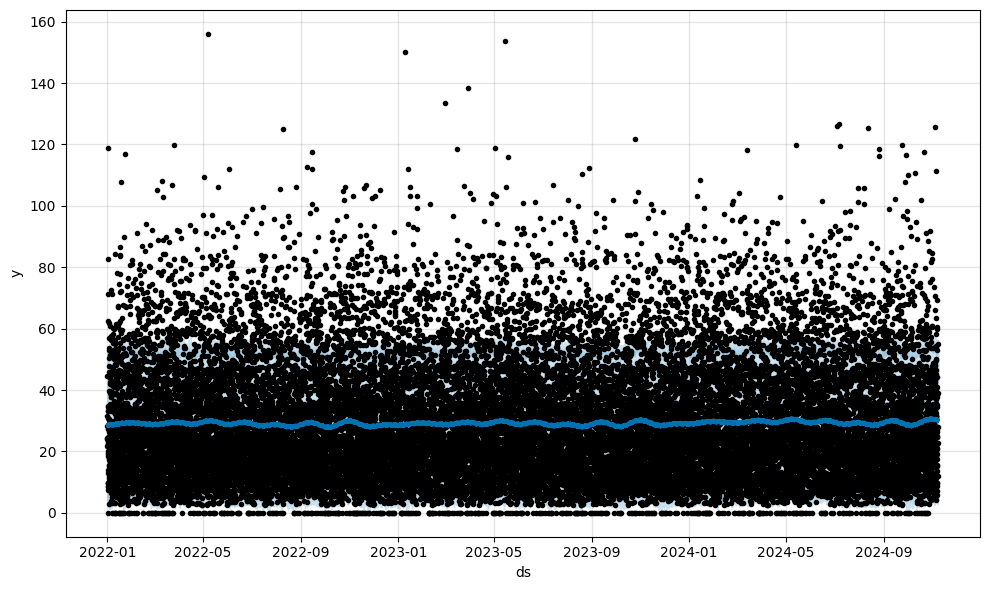

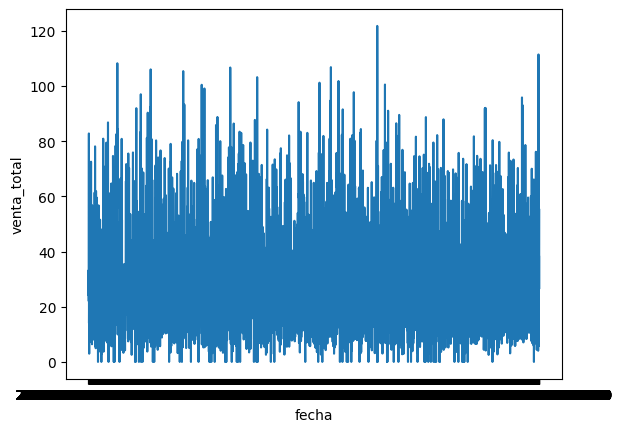

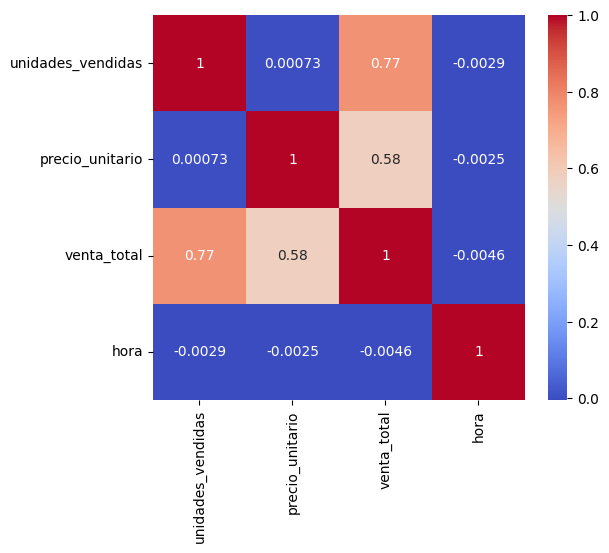

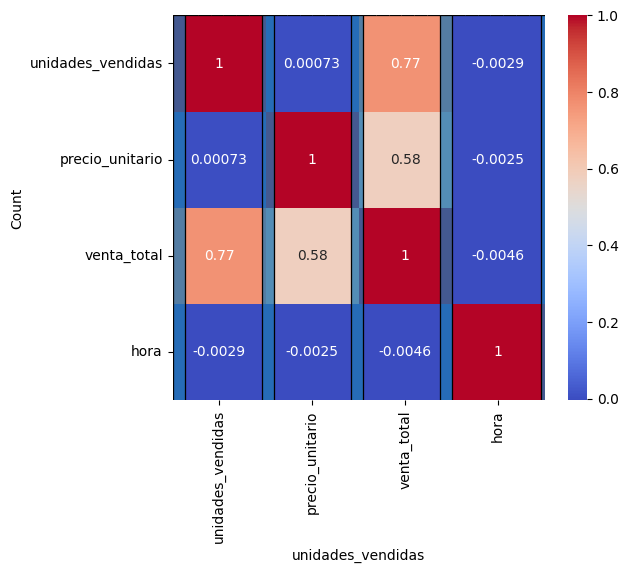

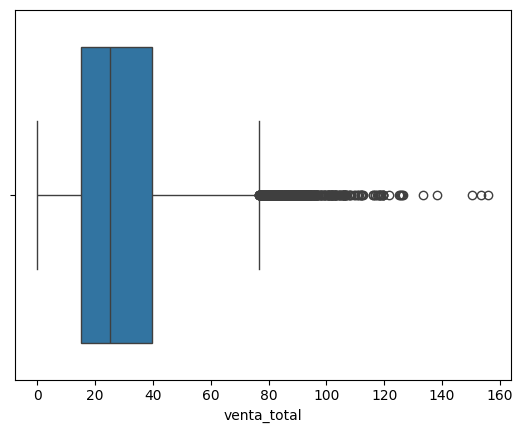

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/5to_ciclo/IDL1_data_analisis_de_la_informacion/Demo_ventas_tienda_conveniencia.csv")

df.describe()

sns.histplot(df["unidades_vendidas"])
plt.show()

sns.boxplot(x=df["venta_total"])
plt.show()

In [32]:
import sys
!{sys.executable} -m pip install streamlit
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

st.title("Análisis Descriptivo")

st.write(df.describe())

fig, ax = plt.subplots()
sns.histplot(df["unidades_vendidas"], ax=ax)
st.pyplot(fig)

2026-01-12 00:45:52.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 00:45:52.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 00:45:52.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 00:45:52.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 00:45:52.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 00:45:52.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 00:45:52.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 00:45:52.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

Analisis inferencial

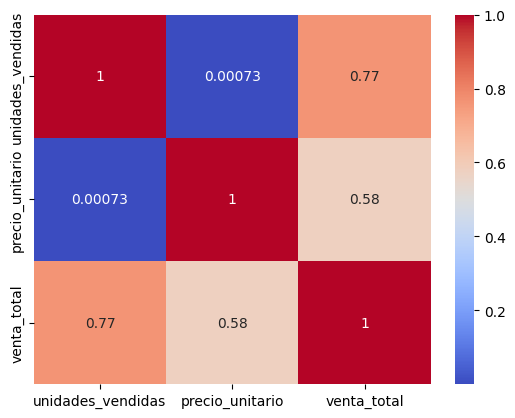

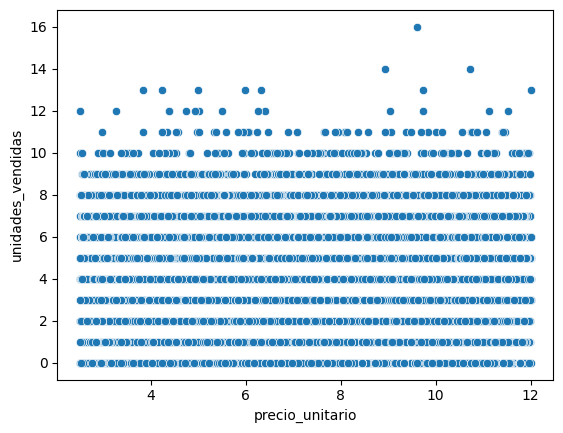

In [18]:
import numpy as np

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

sns.scatterplot(data=df, x="precio_unitario", y="unidades_vendidas")
plt.show()

In [14]:
st.header("Correlaciones")

fig, ax = plt.subplots()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=ax)
st.pyplot(fig)

2026-01-11 19:00:49.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 19:00:49.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 19:00:49.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 19:00:49.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 19:00:49.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 19:00:49.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 19:00:49.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Analisis Predictivo

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



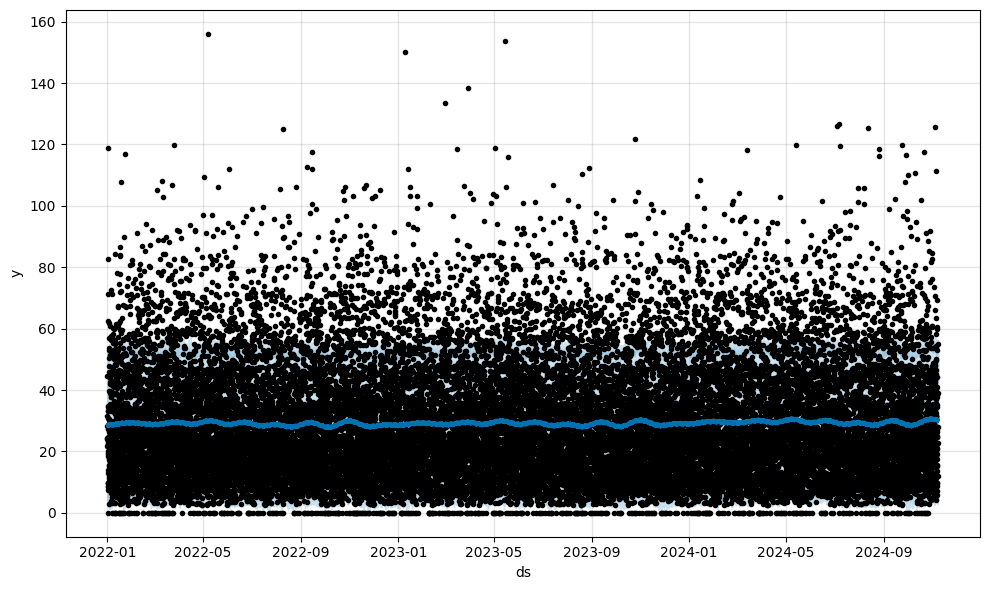

['modelo_ventas.pkl']

In [19]:
from prophet import Prophet
import joblib

df_prophet = df[["fecha", "venta_total"]].rename(columns={"fecha":"ds", "venta_total":"y"})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=24, freq="H")
forecast = model.predict(future)

model.plot(forecast)
plt.show()

# Save the trained model
joblib.dump(model, "modelo_ventas.pkl")

In [20]:
st.header("Forecast de ventas")

fig1 = model.plot(forecast)
st.pyplot(fig1)

2026-01-11 23:41:16.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:16.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:16.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:16.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:17.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:17.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:17.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [21]:
tienda = st.selectbox("Selecciona tienda", df["tienda"].unique())
df_filtrado = df[df["tienda"] == tienda]

fig, ax = plt.subplots()
sns.lineplot(data=df_filtrado, x="fecha", y="venta_total", ax=ax)
st.pyplot(fig)

2026-01-11 23:41:19.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:19.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:19.834 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:19.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:19.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:19.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:19.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:41:25.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [22]:
import joblib

# Load the trained model
modelo = joblib.load("modelo_ventas.pkl")

# Use the 'future' DataFrame for prediction, as it contains the dates for forecasting
pred = modelo.predict(future)

# Display the first few rows of the predictions
display(pred.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01 00:00:00,28.944296,4.149814,53.367539,28.944296,28.944296,-0.037667,-0.037667,-0.037667,0.282338,...,0.016228,0.016228,0.016228,-0.336233,-0.336233,-0.336233,0.0,0.0,0.0,28.906630
1,2022-01-01 01:00:00,28.944298,4.113276,54.678218,28.944298,28.944298,-0.204766,-0.204766,-0.204766,0.124350,...,0.006923,0.006923,0.006923,-0.336039,-0.336039,-0.336039,0.0,0.0,0.0,28.739532
2,2022-01-01 02:00:00,28.944300,3.365984,54.750134,28.944300,28.944300,-0.319819,-0.319819,-0.319819,0.019492,...,-0.003471,-0.003471,-0.003471,-0.335840,-0.335840,-0.335840,0.0,0.0,0.0,28.624481
3,2022-01-01 03:00:00,28.944301,1.457519,52.786388,28.944301,28.944301,-0.354035,-0.354035,-0.354035,-0.003557,...,-0.014845,-0.014845,-0.014845,-0.335633,-0.335633,-0.335633,0.0,0.0,0.0,28.590266
4,2022-01-01 04:00:00,28.944303,4.673442,55.623465,28.944303,28.944303,-0.415907,-0.415907,-0.415907,-0.053412,...,-0.027076,-0.027076,-0.027076,-0.335420,-0.335420,-0.335420,0.0,0.0,0.0,28.528396


streamlit

In [23]:
# app.py
import sys
!{sys.executable} -m pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime

st.set_page_config(page_title="Análisis Estadístico de Ventas - Streamlit", layout="wide")

# ---------------------------
# Helper functions
# ---------------------------
@st.cache_data
def load_data(file_path):
    # This function is modified to load from a given path directly
    df = pd.read_csv(file_path, parse_dates=["fecha"], infer_datetime_format=True)
    return df

def resumen_descriptivo(df):
    numeric = df.select_dtypes(include=[np.number])
    desc = numeric.describe().T
    return desc

def agregar_columnas_temporales(df):
    df = df.copy()
    df["fecha"] = pd.to_datetime(df["fecha"])
    df["fecha_date"] = df["fecha"].dt.date
    df["hora"] = df["fecha"].dt.hour
    # Removed locale='es_ES' to avoid 'unsupported locale setting' error
    df["dia_semana"] = df["fecha"].dt.day_name()
    return df

def plot_histogram(df, column):
    fig = px.histogram(df, x=column, nbins=30, title=f"Histograma de {column}")
    return fig

def plot_box(df, column, by=None):
    if by:
        fig = px.box(df, x=by, y=column, points="outliers", title=f"Boxplot de {column} por {by}")
    else:
        fig = px.box(df, y=column, points="outliers", title=f"Boxplot de {column}")
    return fig

def correlation_heatmap(df):
    corr = df.select_dtypes(include=[np.number]).corr()
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
    return fig

# ---------------------------
# UI: Sidebar - carga y filtros
# ---------------------------
st.sidebar.title("Carga y filtros")
# Directly load the DataFrame from the generated CSV path
# The st.file_uploader and df = load_data(uploaded_file) are commented out/modified
# to ensure df is always loaded when running in Colab without interactive UI
df = load_data("/content/drive/MyDrive/5to_ciclo/IDL1_data_analisis_de_la_informacion/Demo_ventas_tienda_conveniencia.csv")

st.sidebar.markdown("---")
st.sidebar.write("Si no subes archivo, el app mostrará instrucciones y ejemplos.")

# ---------------------------
# Main layout
# ---------------------------
st.title("Análisis de información con métodos estadísticos")
st.markdown("Este app demuestra técnicas descriptivas, inferenciales y predictivas aplicadas al dataset de ventas por hora. "
            "Carga tu archivo CSV con las columnas: **fecha, tienda, producto, turno, unidades_vendidas, precio_unitario, venta_total**.")

# Remove st.stop() since df will always be loaded now
# if df is None:
#     st.info("Sube el archivo CSV en la barra lateral para comenzar. Mientras tanto, aquí tienes una guía rápida de lo que hace la app.")
#     st.markdown("""
#     **Secciones del app**
#     - Análisis descriptivo: resumen numérico, histogramas, boxplots.
#     - Análisis inferencial: correlaciones, pruebas t/ANOVA, regresión simple.
#     - Forecasting simple: promedio móvil y regresión por tiempo.
#     """)
#     st.stop()

# ---------------------------
# Preprocesamiento
# ---------------------------
df = agregar_columnas_temporales(df)
st.sidebar.write("Rango de fechas detectado:")
st.sidebar.write(f"Desde **{df['fecha'].min()}** hasta **{df['fecha'].max()}**")

# Filtros interactivos
with st.sidebar.expander("Filtros interactivos"):
    tiendas = st.multiselect("Selecciona tiendas", options=sorted(df["tienda"].unique()), default=sorted(df["tienda"].unique()))
    productos = st.multiselect("Selecciona productos", options=sorted(df["producto"].unique()), default=sorted(df["producto"].unique()))
    fecha_min = st.date_input("Fecha inicio", value=df["fecha"].dt.date.min())
    fecha_max = st.date_input("Fecha fin", value=df["fecha"].dt.date.max())

# Aplicar filtros
mask = (df["tienda"].isin(tiendas)) & (df["producto"].isin(productos)) & (df["fecha"].dt.date >= fecha_min) & (df["fecha"].dt.date <= fecha_max)
df_f = df.loc[mask].copy()

st.header("1. Datos cargados y limpieza básica")
st.write("Número de registros después de aplicar filtros:", len(df_f))
st.dataframe(df_f.head(50))

# ---------------------------
# 2. Análisis descriptivo
# ---------------------------
st.markdown("---")
st.header("2. Análisis descriptivo")
st.markdown("**Objetivo:** resumir la información con medidas de tendencia central y dispersión. Estas medidas ayudan a entender el comportamiento típico y la variabilidad de las ventas.")

# Resumen numérico
st.subheader("Resumen numérico")
desc = resumen_descriptivo(df_f)
st.table(desc)

# Visualizaciones descriptivas
col1, col2 = st.columns(2)
with col1:
    st.subheader("Histograma de unidades vendidas")
    fig_hist = plot_histogram(df_f, "unidades_vendidas")
    st.plotly_chart(fig_hist, use_container_width=True)
with col2:
    st.subheader("Boxplot de venta_total por producto")
    fig_box = plot_box(df_f, "venta_total", by="producto")
    st.plotly_chart(fig_box, use_container_width=True)

st.subheader("Distribución por turno")
turno_counts = df_f.groupby("turno")["venta_total"].sum().reset_index().sort_values("venta_total", ascending=False)
fig_turno = px.bar(turno_counts, x="turno", y="venta_total", title="Venta total por turno")
st.plotly_chart(fig_turno, use_container_width=True)

# ---------------------------
# 3. Análisis inferencial
# ---------------------------
st.markdown("---")
st.header("3. Análisis inferencial")
st.markdown("**Objetivo:** evaluar relaciones entre variables y contrastar hipótesis. Aquí aplicamos correlación, pruebas de hipótesis y regresión simple.")

# Correlación
st.subheader("Correlación entre variables numéricas")
fig_corr = correlation_heatmap(df_f)
st.pyplot(fig_corr)

# Scatter precio vs unidades
st.subheader("Relación precio_unitario vs unidades_vendidas")
fig_scatter = px.scatter(df_f, x="precio_unitario", y="unidades_vendidas", color="producto", trendline="ols",
                         title="Scatter precio_unitario vs unidades_vendidas con línea de regresión")
st.plotly_chart(fig_scatter, use_container_width=True)

# Prueba t o ANOVA
st.subheader("Comparación de medias entre grupos")
st.markdown("Selecciona una variable categórica para comparar la **venta_total** entre sus grupos usando ANOVA (si >2 grupos) o t-test (2 grupos).")
group_var = st.selectbox("Variable categórica", options=["tienda", "producto", "turno", "dia_semana"])
groups = df_f[group_var].unique()

if len(groups) == 2:
    g1 = df_f[df_f[group_var] == groups[0]]["venta_total"]
    g2 = df_f[df_f[group_var] == groups[1]]["venta_total"]
    tstat, pval = stats.ttest_ind(g1, g2, equal_var=False, nan_policy="omit")
    st.write(f"t-statistic: **{tstat:.3f}**, p-value: **{pval:.4f}**")
    st.write("Interpretación: si p-value < 0.05, hay evidencia de diferencia significativa entre medias.")
else:
    # ANOVA
    samples = [df_f[df_f[group_var] == g]["venta_total"].dropna() for g in groups]
    fstat, pval = stats.f_oneway(*samples)
    st.write(f"ANOVA F-statistic: **{fstat:.3f}**, p-value: **{pval:.4f}**")
    st.write("Interpretación: si p-value < 0.05, al menos un grupo difiere significativamente en la media de venta_total.")

# Regresión lineal simple (ejemplo)
st.subheader("Regresión lineal simple: venta_total ~ unidades_vendidas")
X = df_f[["unidades_vendidas"]].fillna(0)
y = df_f["venta_total"].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
st.write("Coeficiente (slope):", float(reg.coef_[0]))
st.write("Intercept:", float(reg.intercept_))
st.write("R2 en test:", float(r2_score(y_test, y_pred)))
st.write("RMSE en test:", float(np.sqrt(mean_squared_error(y_test, y_pred))))

fig_reg = px.scatter(x=X_test["unidades_vendidas"], y=y_test, labels={"x":"unidades_vendidas", "y":"venta_total"},
                     title="Regresión lineal simple: venta_total vs unidades_vendidas")
fig_reg.add_traces(px.line(x=X_test["unidades_vendidas"].sort_values(), y=np.sort(y_pred)).data)
st.plotly_chart(fig_reg, use_container_width=True)

# ---------------------------
# 4. Análisis temporal y forecasting simple
# ---------------------------
st.markdown("---")
st.header("4. Análisis temporal y forecasting simple")
st.markdown("**Objetivo:** mostrar técnicas básicas de series temporales: agregación, promedio móvil y un forecast simple por regresión temporal.")

# Agregar serie temporal agregada por hora o día
freq = st.selectbox("Agregación temporal", options=["H", "D"], index=1, help="H = hora, D = día")
if freq == "H":
    ts = df_f.set_index("fecha").resample("H")["venta_total"].sum().reset_index()
else:
    ts = df_f.set_index("fecha").resample("D")["venta_total"].sum().reset_index()

st.subheader("Serie temporal agregada")
fig_ts = px.line(ts, x="fecha", y="venta_total", title="Serie temporal de venta_total")
st.plotly_chart(fig_ts, use_container_width=True)

# Promedio móvil
window = st.slider("Ventana promedio móvil (periodos)", min_value=2, max_value=30, value=7)
ts["ma"] = ts["venta_total"].rolling(window=window, min_periods=1).mean()
fig_ma = px.line(ts, x="fecha", y=["venta_total", "ma"], labels={"value":"venta_total / ma"})
fig_ma.update_layout(title=f"Venta total y promedio móvil (window={window})")
st.plotly_chart(fig_ma, use_container_width=True)

# Forecasting simple por regresión con tendencia y estacionalidad horaria (si freq=H)
st.subheader("Forecasting simple por regresión temporal")
st.markdown("Se crea una regresión lineal usando índice temporal y componentes cíclicos (hora del día) como features. Es un ejemplo pedagógico, no un modelo de producción.")

# Preparar features
ts_model = ts.copy()
ts_model = ts_model.dropna().reset_index(drop=True)
ts_model["t"] = np.arange(len(ts_model))
if freq == "H":
    ts_model["hour"] = ts_model["fecha"].dt.hour
    # codificar ciclo horario con sen/cos
    ts_model["hour_sin"] = np.sin(2 * np.pi * ts_model["hour"] / 24)
    ts_model["hour_cos"] = np.cos(2 * np.pi * ts_model["hour"] / 24)
    features = ["t", "hour_sin", "hour_cos"]
else:
    ts_model["dayofweek"] = ts_model["fecha"].dt.dayofweek
    ts_model["dow_sin"] = np.sin(2 * np.pi * ts_model["dayofweek"] / 7)
    ts_model["dow_cos"] = np.cos(2 * np.pi * ts_model["dayofweek"] / 7)
    features = ["t", "dow_sin", "dow_cos"]

X = ts_model[features]
y = ts_model["venta_total"]
model_time = LinearRegression().fit(X, y)

# Predecir horizon
horizon = st.number_input("Horizonte de forecast (periodos)", min_value=1, max_value=168, value=24)
last_t = ts_model["t"].iloc[-1]
future_pred_data = [] # Renamed to avoid conflict with global 'future' from Prophet
for i in range(1, horizon + 1):
    t_i = last_t + i
    if freq == "H":
        # calcular hora futura aproximada
        last_date = ts_model["fecha"].iloc[-1]
        future_date = last_date + pd.Timedelta(hours=i)
        hour = future_date.hour
        hour_sin = np.sin(2 * np.pi * hour / 24)
        hour_cos = np.cos(2 * np.pi * hour / 24)
        future_pred_data.append({"fecha": future_date, "t": t_i, "hour_sin": hour_sin, "hour_cos": hour_cos})
    else:
        last_date = ts_model["fecha"].iloc[-1]
        future_date = last_date + pd.Timedelta(days=i)
        dow = future_date.dayofweek
        dow_sin = np.sin(2 * np.pi * dow / 7)
        dow_cos = np.cos(2 * np.pi * dow / 7)
        future_pred_data.append({"fecha": future_date, "t": t_i, "dow_sin": dow_sin, "dow_cos": dow_cos})

df_future_pred = pd.DataFrame(future_pred_data)
X_future = df_future_pred[features]
y_future_pred = model_time.predict(X_future)

# Mostrar forecast
df_forecast = pd.DataFrame({"fecha": df_future_pred["fecha"], "forecast": y_future_pred})
fig_forecast = px.line(pd.concat([ts[["fecha", "venta_total"]].rename(columns={"venta_total":"value"}),
                                 df_forecast.rename(columns={"forecast":"value"})]),
                       x="fecha", y="value", color_discrete_sequence=["#636EFA"])
# plot original and forecast separately for clarity
fig = px.line(ts, x="fecha", y="venta_total", title="Serie y Forecast")
fig.add_scatter(x=df_forecast["fecha"], y=df_forecast["forecast"], mode="lines", name="Forecast")
st.plotly_chart(fig, use_container_width=True)

st.markdown("**Nota pedagógica:** este forecast usa regresión lineal con componentes cíclicos. Para producción se recomiendan modelos especializados (Prophet, SARIMA, modelos ML).")

# ---------------------------
# 5. Conclusiones y export
# ---------------------------
st.markdown("---")
st.header("5. Conclusiones y siguientes pasos")
st.markdown("""
**Qué aprendimos**
- El análisis descriptivo resume la información y detecta outliers y patrones.
- El análisis inferencial permite contrastar hipótesis y cuantificar relaciones.
- El análisis temporal y forecasting requiere agregar series y modelar tendencia y estacionalidad.
""")

st.subheader("Siguientes pasos recomendados")
st.write("- Validar calidad de datos (missing, duplicados, precios atípicos).")
st.write("- Probar modelos de series temporales especializados (Prophet, SARIMA).")
st.write("- Evaluar modelos de ML para predicción por tienda/producto.")
st.write("- Construir un dashboard con filtros y alertas para operaciones.")

st.info("Puedes descargar el dataset filtrado para seguir trabajando localmente.")
csv = df_f.to_csv(index=False).encode("utf-8")
st.download_button("Descargar datos filtrados (CSV)", data=csv, file_name="ventas_filtradas.csv", mime="text/csv")

2026-01-11 23:42:14.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:42:14.149 No runtime found, using MemoryCacheStorageManager
2026-01-11 23:42:14.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:42:14.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:42:14.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:42:14.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:42:14.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:42:14.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 23:42:14.171 Thread 'MainThread':

False

In [33]:
streamlit_code = '''
# app.py
import sys
!{sys.executable} -m pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime

st.set_page_config(page_title="Análisis Estadístico de Ventas - Streamlit", layout="wide")

# ---------------------------
# Helper functions
# ---------------------------
@st.cache_data
def load_data(file_path):
    # This function is modified to load from a given path directly
    df = pd.read_csv(file_path, parse_dates=["fecha"], infer_datetime_format=True)
    return df

def resumen_descriptivo(df):
    numeric = df.select_dtypes(include=[np.number])
    desc = numeric.describe().T
    return desc

def agregar_columnas_temporales(df):
    df = df.copy()
    df["fecha"] = pd.to_datetime(df["fecha"])
    df["fecha_date"] = df["fecha"].dt.date
    df["hora"] = df["fecha"].dt.hour
    # Removed locale='es_ES' to avoid 'unsupported locale setting' error
    df["dia_semana"] = df["fecha"].dt.day_name()
    return df

def plot_histogram(df, column):
    fig = px.histogram(df, x=column, nbins=30, title=f"Histograma de {column}")
    return fig

def plot_box(df, column, by=None):
    if by:
        fig = px.box(df, x=by, y=column, points="outliers", title=f"Boxplot de {column} por {by}")
    else:
        fig = px.box(df, y=column, points="outliers", title=f"Boxplot de {column}")
    return fig

def correlation_heatmap(df):
    corr = df.select_dtypes(include=[np.number]).corr()
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
    return fig

# ---------------------------
# UI: Sidebar - carga y filtros
# ---------------------------
st.sidebar.title("Carga y filtros")
# Directly load the DataFrame from the generated CSV path
# The st.file_uploader and df = load_data(uploaded_file) are commented out/modified
# to ensure df is always loaded when running in Colab without interactive UI
df = load_data("/content/drive/MyDrive/5to_ciclo/IDL1_data_analisis_de_la_informacion/Demo_ventas_tienda_conveniencia.csv")

st.sidebar.markdown("---")
st.sidebar.write("Si no subes archivo, el app mostrará instrucciones y ejemplos.")

# ---------------------------
# Main layout
# ---------------------------
st.title("Análisis de información con métodos estadísticos")
st.markdown("Este app demuestra técnicas descriptivas, inferenciales y predictivas aplicadas al dataset de ventas por hora. "
            "Carga tu archivo CSV con las columnas: **fecha, tienda, producto, turno, unidades_vendidas, precio_unitario, venta_total**.")

# Remove st.stop() since df will always be loaded now
# if df is None:
#     st.info("Sube el archivo CSV en la barra lateral para comenzar. Mientras tanto, aquí tienes una guía rápida de lo que hace la app.")
#     st.markdown("""
#     **Secciones del app**
#     - Análisis descriptivo: resumen numérico, histogramas, boxplots.
#     - Análisis inferencial: correlaciones, pruebas t/ANOVA, regresión simple.
#     - Forecasting simple: promedio móvil y regresión por tiempo.
#     """)
#     st.stop()

# ---------------------------
# Preprocesamiento
# ---------------------------
df = agregar_columnas_temporales(df)
st.sidebar.write("Rango de fechas detectado:")
st.sidebar.write(f"Desde **{df['fecha'].min()}** hasta **{df['fecha'].max()}**")

# Filtros interactivos
with st.sidebar.expander("Filtros interactivos"):
    tiendas = st.multiselect("Selecciona tiendas", options=sorted(df["tienda"].unique()), default=sorted(df["tienda"].unique()))
    productos = st.multiselect("Selecciona productos", options=sorted(df["producto"].unique()), default=sorted(df["producto"].unique()))
    fecha_min = st.date_input("Fecha inicio", value=df["fecha"].dt.date.min())
    fecha_max = st.date_input("Fecha fin", value=df["fecha"].dt.date.max())

# Aplicar filtros
mask = (df["tienda"].isin(tiendas)) & (df["producto"].isin(productos)) & (df["fecha"].dt.date >= fecha_min) & (df["fecha"].dt.date <= fecha_max)
df_f = df.loc[mask].copy()

st.header("1. Datos cargados y limpieza básica")
st.write("Número de registros después de aplicar filtros:", len(df_f))
st.dataframe(df_f.head(50))

# ---------------------------
# 2. Análisis descriptivo
# ---------------------------
st.markdown("---")
st.header("2. Análisis descriptivo")
st.markdown("**Objetivo:** resumir la información con medidas de tendencia central y dispersión. Estas medidas ayudan a entender el comportamiento típico y la variabilidad de las ventas.")

# Resumen numérico
st.subheader("Resumen numérico")
desc = resumen_descriptivo(df_f)
st.table(desc)

# Visualizaciones descriptivas
col1, col2 = st.columns(2)
with col1:
    st.subheader("Histograma de unidades vendidas")
    fig_hist = plot_histogram(df_f, "unidades_vendidas")
    st.plotly_chart(fig_hist, use_container_width=True)
with col2:
    st.subheader("Boxplot de venta_total por producto")
    fig_box = plot_box(df_f, "venta_total", by="producto")
    st.plotly_chart(fig_box, use_container_width=True)

st.subheader("Distribución por turno")
turno_counts = df_f.groupby("turno")["venta_total"].sum().reset_index().sort_values("venta_total", ascending=False)
fig_turno = px.bar(turno_counts, x="turno", y="venta_total", title="Venta total por turno")
st.plotly_chart(fig_turno, use_container_width=True)

# ---------------------------
# 3. Análisis inferencial
# ---------------------------
st.markdown("---")
st.header("3. Análisis inferencial")
st.markdown("**Objetivo:** evaluar relaciones entre variables y contrastar hipótesis. Aquí aplicamos correlación, pruebas de hipótesis y regresión simple.")

# Correlación
st.subheader("Correlación entre variables numéricas")
fig_corr = correlation_heatmap(df_f)
st.pyplot(fig_corr)

# Scatter precio vs unidades
st.subheader("Relación precio_unitario vs unidades_vendidas")
fig_scatter = px.scatter(df_f, x="precio_unitario", y="unidades_vendidas", color="producto", trendline="ols",
                         title="Scatter precio_unitario vs unidades_vendidas con línea de regresión")
st.plotly_chart(fig_scatter, use_container_width=True)

# Prueba t o ANOVA
st.subheader("Comparación de medias entre grupos")
st.markdown("Selecciona una variable categórica para comparar la **venta_total** entre sus grupos usando ANOVA (si >2 grupos) o t-test (2 grupos).")
group_var = st.selectbox("Variable categórica", options=["tienda", "producto", "turno", "dia_semana"])
groups = df_f[group_var].unique()

if len(groups) == 2:
    g1 = df_f[df_f[group_var] == groups[0]]["venta_total"]
    g2 = df_f[df_f[group_var] == groups[1]]["venta_total"]
    tstat, pval = stats.ttest_ind(g1, g2, equal_var=False, nan_policy="omit")
    st.write(f"t-statistic: **{tstat:.3f}**, p-value: **{pval:.4f}**")
    st.write("Interpretación: si p-value < 0.05, hay evidencia de diferencia significativa entre medias.")
else:
    # ANOVA
    samples = [df_f[df_f[group_var] == g]["venta_total"].dropna() for g in groups]
    fstat, pval = stats.f_oneway(*samples)
    st.write(f"ANOVA F-statistic: **{fstat:.3f}**, p-value: **{pval:.4f}**")
    st.write("Interpretación: si p-value < 0.05, al menos un grupo difiere significativamente en la media de venta_total.")

# Regresión lineal simple (ejemplo)
st.subheader("Regresión lineal simple: venta_total ~ unidades_vendidas")
X = df_f[["unidades_vendidas"]].fillna(0)
y = df_f["venta_total"].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
st.write("Coeficiente (slope):", float(reg.coef_[0]))
st.write("Intercept:", float(reg.intercept_))
st.write("R2 en test:", float(r2_score(y_test, y_pred)))
st.write("RMSE en test:", float(np.sqrt(mean_squared_error(y_test, y_pred))))

fig_reg = px.scatter(x=X_test["unidades_vendidas"], y=y_test, labels={"x":"unidades_vendidas", "y":"venta_total"},
                     title="Regresión lineal simple: venta_total vs unidades_vendidas")
fig_reg.add_traces(px.line(x=X_test["unidades_vendidas"].sort_values(), y=np.sort(y_pred)).data)
st.plotly_chart(fig_reg, use_container_width=True)

# ---------------------------
# 4. Análisis temporal y forecasting simple
# ---------------------------
st.markdown("---")
st.header("4. Análisis temporal y forecasting simple")
st.markdown("**Objetivo:** mostrar técnicas básicas de series temporales: agregación, promedio móvil y un forecast simple por regresión temporal.")

# Agregar serie temporal agregada por hora o día
freq = st.selectbox("Agregación temporal", options=["H", "D"], index=1, help="H = hora, D = día")
if freq == "H":
    ts = df_f.set_index("fecha").resample("H")["venta_total"].sum().reset_index()
else:
    ts = df_f.set_index("fecha").resample("D")["venta_total"].sum().reset_index()

st.subheader("Serie temporal agregada")
fig_ts = px.line(ts, x="fecha", y="venta_total", title="Serie temporal de venta_total")
st.plotly_chart(fig_ts, use_container_width=True)

# Promedio móvil
window = st.slider("Ventana promedio móvil (periodos)", min_value=2, max_value=30, value=7)
ts["ma"] = ts["venta_total"].rolling(window=window, min_periods=1).mean()
fig_ma = px.line(ts, x="fecha", y=["venta_total", "ma"], labels={"value":"venta_total / ma"})
fig_ma.update_layout(title=f"Venta total y promedio móvil (window={window})")
st.plotly_chart(fig_ma, use_container_width=True)

# Forecasting simple por regresión con tendencia y estacionalidad horaria (si freq=H)
st.subheader("Forecasting simple por regresión temporal")
st.markdown("Se crea una regresión lineal usando índice temporal y componentes cíclicos (hora del día) como features. Es un ejemplo pedagógico, no un modelo de producción.")

# Preparar features
ts_model = ts.copy()
ts_model = ts_model.dropna().reset_index(drop=True)
ts_model["t"] = np.arange(len(ts_model))
if freq == "H":
    ts_model["hour"] = ts_model["fecha"].dt.hour
    # codificar ciclo horario con sen/cos
    ts_model["hour_sin"] = np.sin(2 * np.pi * ts_model["hour"] / 24)
    ts_model["hour_cos"] = np.cos(2 * np.pi * ts_model["hour"] / 24)
    features = ["t", "hour_sin", "hour_cos"]
else:
    ts_model["dayofweek"] = ts_model["fecha"].dt.dayofweek
    ts_model["dow_sin"] = np.sin(2 * np.pi * ts_model["dayofweek"] / 7)
    ts_model["dow_cos"] = np.cos(2 * np.pi * ts_model["dayofweek"] / 7)
    features = ["t", "dow_sin", "dow_cos"]

X = ts_model[features]
y = ts_model["venta_total"]
model_time = LinearRegression().fit(X, y)

# Predecir horizon
horizon = st.number_input("Horizonte de forecast (periodos)", min_value=1, max_value=168, value=24)
last_t = ts_model["t"].iloc[-1]
future_pred_data = [] # Renamed to avoid conflict with global 'future' from Prophet
for i in range(1, horizon + 1):
    t_i = last_t + i
    if freq == "H":
        # calcular hora futura aproximada
        last_date = ts_model["fecha"].iloc[-1]
        future_date = last_date + pd.Timedelta(hours=i)
        hour = future_date.hour
        hour_sin = np.sin(2 * np.pi * hour / 24)
        hour_cos = np.cos(2 * np.pi * hour / 24)
        future_pred_data.append({"fecha": future_date, "t": t_i, "hour_sin": hour_sin, "hour_cos": hour_cos})
    else:
        last_date = ts_model["fecha"].iloc[-1]
        future_date = last_date + pd.Timedelta(days=i)
        dow = future_date.dayofweek
        dow_sin = np.sin(2 * np.pi * dow / 7)
        dow_cos = np.cos(2 * np.pi * dow / 7)
        future_pred_data.append({"fecha": future_date, "t": t_i, "dow_sin": dow_sin, "dow_cos": dow_cos})

df_future_pred = pd.DataFrame(future_pred_data)
X_future = df_future_pred[features]
y_future_pred = model_time.predict(X_future)

# Mostrar forecast
df_forecast = pd.DataFrame({"fecha": df_future_pred["fecha"], "forecast": y_future_pred})
fig_forecast = px.line(pd.concat([ts[["fecha", "venta_total"]].rename(columns={"venta_total":"value"}),
                                 df_forecast.rename(columns={"forecast":"value"})]),
                       x="fecha", y="value", color_discrete_sequence=["#636EFA"])
# plot original and forecast separately for clarity
fig = px.line(ts, x="fecha", y="venta_total", title="Serie y Forecast")
fig.add_scatter(x=df_forecast["fecha"], y=df_forecast["forecast"], mode="lines", name="Forecast")
st.plotly_chart(fig, use_container_width=True)

st.markdown("**Nota pedagógica:** este forecast usa regresión lineal con componentes cíclicos. Para producción se recomiendan modelos especializados (Prophet, SARIMA, modelos ML).")

# ---------------------------
# 5. Conclusiones y export
# ---------------------------
st.markdown("---")
st.header("5. Conclusiones y siguientes pasos")
st.markdown("""
**Qué aprendimos**
- El análisis descriptivo resume la información y detecta outliers y patrones.
- El análisis inferencial permite contrastar hipótesis y cuantificar relaciones.
- El análisis temporal y forecasting requiere agregar series y modelar tendencia y estacionalidad.
""")

st.subheader("Siguientes pasos recomendados")
st.write("- Validar calidad de datos (missing, duplicados, precios atípicos).")
st.write("- Probar modelos de series temporales especializados (Prophet, SARIMA).")
st.write("- Evaluar modelos de ML para predicción por tienda/producto.")
st.write("- Construir un dashboard con filtros y alertas para operaciones.")

st.info("Puedes descargar el dataset filtrado para seguir trabajando localmente.")
csv = df_f.to_csv(index=False).encode("utf-8")
st.download_button("Descargar datos filtrados (CSV)", data=csv, file_name="ventas_filtradas.csv", mime="text/csv")
'''

with open("app.py", "w") as f:
    f.write(streamlit_code)

print("Archivo 'app.py' generado exitosamente.")

Archivo 'app.py' generado exitosamente.


### Pasos para ejecutar la aplicación Streamlit localmente:

1.  **Guarda el código de la aplicación en un archivo Python:**
    Copia todo el contenido de la celda `nhvuGpyR6Ssw` (el código que define la aplicación Streamlit) y guárdalo en un archivo llamado, por ejemplo, `app.py` en tu máquina local.

2.  **Instala Streamlit (si no lo has hecho ya):**
    Abre tu terminal o símbolo del sistema y ejecuta:
    ```bash
    pip install streamlit pandas numpy matplotlib seaborn plotly scikit-learn
    ```

3.  **Ejecuta la aplicación:**
    Navega hasta el directorio donde guardaste `app.py` y ejecuta el siguiente comando:
    ```bash
    streamlit run app.py
    ```

4.  **Abre la aplicación en tu navegador:**
    Streamlit abrirá automáticamente la aplicación en tu navegador web predeterminado (o te proporcionará una URL si necesitas copiarla manualmente).

Con esto, podrás interactuar con tu aplicación Streamlit de forma local.

-----------------------------------------
NUEVO STREAMLIT
---------------------------------------

In [34]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime

st.set_page_config(page_title="Análisis Estadístico de Ventas - Streamlit", layout="wide")

# ---------------------------
# Helper functions
# ---------------------------
@st.cache_data
def load_data(file_path):
    # This function is modified to load from a given path directly
    df = pd.read_csv(file_path, parse_dates=["fecha"], infer_datetime_format=True)
    return df

def resumen_descriptivo(df):
    numeric = df.select_dtypes(include=[np.number])
    desc = numeric.describe().T
    return desc

def agregar_columnas_temporales(df):
    df = df.copy()
    df["fecha"] = pd.to_datetime(df["fecha"])
    df["fecha_date"] = df["fecha"].dt.date
    df["hora"] = df["fecha"].dt.hour
    # Removed locale='es_ES' to avoid 'unsupported locale setting' error
    df["dia_semana"] = df["fecha"].dt.day_name()
    return df

def plot_histogram(df, column):
    fig = px.histogram(df, x=column, nbins=30, title=f"Histograma de {column}")
    return fig

def plot_box(df, column, by=None):
    if by:
        fig = px.box(df, x=by, y=column, points="outliers", title=f"Boxplot de {column} por {by}")
    else:
        fig = px.box(df, y=column, points="outliers", title=f"Boxplot de {column}")
    return fig

def correlation_heatmap(df):
    corr = df.select_dtypes(include=[np.number]).corr()
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
    return fig

# ---------------------------
# UI: Sidebar - carga y filtros
# ---------------------------
st.sidebar.title("Carga y filtros")
# Directly load the DataFrame from the generated CSV path
# The st.file_uploader and df = load_data(uploaded_file) are commented out/modified
# to ensure df is always loaded when running in Colab without interactive UI
df = load_data("/content/drive/MyDrive/5to_ciclo/IDL1_data_analisis_de_la_informacion/Demo_ventas_tienda_conveniencia.csv")

st.sidebar.markdown("---")
st.sidebar.write("Si no subes archivo, el app mostrará instrucciones y ejemplos.")

# ---------------------------
# Main layout
# ---------------------------
st.title("Análisis de información con métodos estadísticos")
st.markdown("Este app demuestra técnicas descriptivas, inferenciales y predictivas aplicadas al dataset de ventas por hora. "
            "Carga tu archivo CSV con las columnas: **fecha, tienda, producto, turno, unidades_vendidas, precio_unitario, venta_total**.")

# Remove st.stop() since df will always be loaded now
# if df is None:
#     st.info("Sube el archivo CSV en la barra lateral para comenzar. Mientras tanto, aquí tienes una guía rápida de lo que hace la app.")
#     st.markdown("""
#     **Secciones del app**
#     - Análisis descriptivo: resumen numérico, histogramas, boxplots.
#     - Análisis inferencial: correlaciones, pruebas t/ANOVA, regresión simple.
#     - Forecasting simple: promedio móvil y regresión por tiempo.
#     """)
#     st.stop()

# ---------------------------
# Preprocesamiento
# ---------------------------
df = agregar_columnas_temporales(df)
st.sidebar.write("Rango de fechas detectado:")
st.sidebar.write(f"Desde **{df['fecha'].min()}** hasta **{df['fecha'].max()}**")

# Filtros interactivos
with st.sidebar.expander("Filtros interactivos"):
    tiendas = st.multiselect("Selecciona tiendas", options=sorted(df["tienda"].unique()), default=sorted(df["tienda"].unique()))
    productos = st.multiselect("Selecciona productos", options=sorted(df["producto"].unique()), default=sorted(df["producto"].unique()))
    fecha_min = st.date_input("Fecha inicio", value=df["fecha"].dt.date.min())
    fecha_max = st.date_input("Fecha fin", value=df["fecha"].dt.date.max())

# Aplicar filtros
mask = (df["tienda"].isin(tiendas)) & (df["producto"].isin(productos)) & (df["fecha"].dt.date >= fecha_min) & (df["fecha"].dt.date <= fecha_max)
df_f = df.loc[mask].copy()

st.header("1. Datos cargados y limpieza básica")
st.write("Número de registros después de aplicar filtros:", len(df_f))
st.dataframe(df_f.head(50))

# ---------------------------
# 2. Análisis descriptivo
# ---------------------------
st.markdown("---")
st.header("2. Análisis descriptivo")
st.markdown("**Objetivo:** resumir la información con medidas de tendencia central y dispersión. Estas medidas ayudan a entender el comportamiento típico y la variabilidad de las ventas.")

# Resumen numérico
st.subheader("Resumen numérico")
desc = resumen_descriptivo(df_f)
st.table(desc)

# Visualizaciones descriptivas
col1, col2 = st.columns(2)
with col1:
    st.subheader("Histograma de unidades vendidas")
    fig_hist = plot_histogram(df_f, "unidades_vendidas")
    st.plotly_chart(fig_hist, width='stretch')
with col2:
    st.subheader("Boxplot de venta_total por producto")
    fig_box = plot_box(df_f, "venta_total", by="producto")
    st.plotly_chart(fig_box, width='stretch')

st.subheader("Distribución por turno")
turno_counts = df_f.groupby("turno")["venta_total"].sum().reset_index().sort_values("venta_total", ascending=False)
fig_turno = px.bar(turno_counts, x="turno", y="venta_total", title="Venta total por turno")
st.plotly_chart(fig_turno, width='stretch')

# ---------------------------
# 3. Análisis inferencial
# ---------------------------
st.markdown("---")
st.header("3. Análisis inferencial")
st.markdown("**Objetivo:** evaluar relaciones entre variables y contrastar hipótesis. Aquí aplicamos correlación, pruebas de hipótesis y regresión simple.")

# Correlación
st.subheader("Correlación entre variables numéricas")
fig_corr = correlation_heatmap(df_f)
st.pyplot(fig_corr)

# Scatter precio vs unidades
st.subheader("Relación precio_unitario vs unidades_vendidas")
fig_scatter = px.scatter(df_f, x="precio_unitario", y="unidades_vendidas", color="producto", trendline="ols",
                         title="Scatter precio_unitario vs unidades_vendidas con línea de regresión")
st.plotly_chart(fig_scatter, width='stretch')

# Prueba t o ANOVA
st.subheader("Comparación de medias entre grupos")
st.markdown("Selecciona una variable categórica para comparar la **venta_total** entre sus grupos usando ANOVA (si >2 grupos) o t-test (2 grupos).")
group_var = st.selectbox("Variable categórica", options=["tienda", "producto", "turno", "dia_semana"])
groups = df_f[group_var].unique()

if len(groups) == 2:
    g1 = df_f[df_f[group_var] == groups[0]]["venta_total"]
    g2 = df_f[df_f[group_var] == groups[1]]["venta_total"]
    tstat, pval = stats.ttest_ind(g1, g2, equal_var=False, nan_policy="omit")
    st.write(f"t-statistic: **{tstat:.3f}**, p-value: **{pval:.4f}**")
    st.write("Interpretación: si p-value < 0.05, hay evidencia de diferencia significativa entre medias.")
else:
    # ANOVA
    samples = [df_f[df_f[group_var] == g]["venta_total"].dropna() for g in groups]
    fstat, pval = stats.f_oneway(*samples)
    st.write(f"ANOVA F-statistic: **{fstat:.3f}**, p-value: **{pval:.4f}**")
    st.write("Interpretación: si p-value < 0.05, al menos un grupo difiere significativamente en la media de venta_total.")

# Regresión lineal simple (ejemplo)
st.subheader("Regresión lineal simple: venta_total ~ unidades_vendidas")
X = df_f[["unidades_vendidas"]].fillna(0)
y = df_f["venta_total"].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
st.write("Coeficiente (slope):", float(reg.coef_[0]))
st.write("Intercept:", float(reg.intercept_))
st.write("R2 en test:", float(r2_score(y_test, y_pred)))
st.write("RMSE en test:", float(np.sqrt(mean_squared_error(y_test, y_pred))))

fig_reg = px.scatter(x=X_test["unidades_vendidas"], y=y_test, labels={"x":"unidades_vendidas", "y":"venta_total"},
                     title="Regresión lineal simple: venta_total vs unidades_vendidas")
fig_reg.add_traces(px.line(x=X_test["unidades_vendidas"].sort_values(), y=np.sort(y_pred)).data)
st.plotly_chart(fig_reg, width='stretch')

# ---------------------------
# 4. Análisis temporal y forecasting simple
# ---------------------------
st.markdown("---")
st.header("4. Análisis temporal y forecasting simple")
st.markdown("**Objetivo:** mostrar técnicas básicas de series temporales: agregación, promedio móvil y un forecast simple por regresión temporal.")

# Agregar serie temporal agregada por hora o día
freq = st.selectbox("Agregación temporal", options=["H", "D"], index=1, help="H = hora, D = día")
if freq == "H":
    ts = df_f.set_index("fecha").resample("H")["venta_total"].sum().reset_index()
else:
    ts = df_f.set_index("fecha").resample("D")["venta_total"].sum().reset_index()

st.subheader("Serie temporal agregada")
fig_ts = px.line(ts, x="fecha", y="venta_total", title="Serie temporal de venta_total")
st.plotly_chart(fig_ts, width='stretch')

# Promedio móvil
window = st.slider("Ventana promedio móvil (periodos)", min_value=2, max_value=30, value=7)
ts["ma"] = ts["venta_total"].rolling(window=window, min_periods=1).mean()
fig_ma = px.line(ts, x="fecha", y=["venta_total", "ma"], labels={"value":"venta_total / ma"})
fig_ma.update_layout(title=f"Venta total y promedio móvil (window={window})")
st.plotly_chart(fig_ma, width='stretch')

# Forecasting simple por regresión con tendencia y estacionalidad horaria (si freq=H)
st.subheader("Forecasting simple por regresión temporal")
st.markdown("Se crea una regresión lineal usando índice temporal y componentes cíclicos (hora del día) como features. Es un ejemplo pedagógico, no un modelo de producción.")

# Preparar features
ts_model = ts.copy()
ts_model = ts_model.dropna().reset_index(drop=True)
ts_model["t"] = np.arange(len(ts_model))
if freq == "H":
    ts_model["hour"] = ts_model["fecha"].dt.hour
    # codificar ciclo horario con sen/cos
    ts_model["hour_sin"] = np.sin(2 * np.pi * ts_model["hour"] / 24)
    ts_model["hour_cos"] = np.cos(2 * np.pi * ts_model["hour"] / 24)
    features = ["t", "hour_sin", "hour_cos"]
else:
    ts_model["dayofweek"] = ts_model["fecha"].dt.dayofweek
    ts_model["dow_sin"] = np.sin(2 * np.pi * ts_model["dayofweek"] / 7)
    ts_model["dow_cos"] = np.cos(2 * np.pi * ts_model["dayofweek"] / 7)
    features = ["t", "dow_sin", "dow_cos"]

X = ts_model[features]
y = ts_model["venta_total"]
model_time = LinearRegression().fit(X, y)

# Predecir horizon
horizon = st.number_input("Horizonte de forecast (periodos)", min_value=1, max_value=168, value=24)
last_t = ts_model["t"].iloc[-1]
future = []
for i in range(1, horizon + 1):
    t_i = last_t + i
    if freq == "H":
        # calcular hora futura aproximada
        last_date = ts_model["fecha"].iloc[-1]
        future_date = last_date + pd.Timedelta(hours=i)
        hour = future_date.hour
        hour_sin = np.sin(2 * np.pi * hour / 24)
        hour_cos = np.cos(2 * np.pi * hour / 24)
        future.append({"fecha": future_date, "t": t_i, "hour_sin": hour_sin, "hour_cos": hour_cos})
    else:
        last_date = ts_model["fecha"].iloc[-1]
        future_date = last_date + pd.Timedelta(days=i)
        dow = future_date.dayofweek
        dow_sin = np.sin(2 * np.pi * dow / 7)
        dow_cos = np.cos(2 * np.pi * dow / 7)
        future.append({"fecha": future_date, "t": t_i, "dow_sin": dow_sin, "dow_cos": dow_cos})

df_future = pd.DataFrame(future)
X_future = df_future[features]
y_future_pred = model_time.predict(X_future)

# Mostrar forecast
df_forecast = pd.DataFrame({"fecha": df_future["fecha"], "forecast": y_future_pred})
fig_forecast = px.line(pd.concat([ts[["fecha", "venta_total"]].rename(columns={"venta_total":"value"}),
                                 df_forecast.rename(columns={"forecast":"value"})]),
                       x="fecha", y="value", color_discrete_sequence=["#636EFA"])
# plot original and forecast separately for clarity
fig = px.line(ts, x="fecha", y="venta_total", title="Serie y Forecast")
fig.add_scatter(x=df_forecast["fecha"], y=df_forecast["forecast"], mode="lines", name="Forecast")
st.plotly_chart(fig, width='stretch')

st.markdown("**Nota pedagógica:** este forecast usa regresión lineal con componentes cíclicos. Para producción se recomiendan modelos especializados (Prophet, SARIMA, modelos ML).")

# ---------------------------
# 5. Conclusiones y export
# ---------------------------
st.markdown("---")
st.header("5. Conclusiones y siguientes pasos")
st.markdown("""
**Qué aprendimos**
- El análisis descriptivo resume la información y detecta outliers y patrones.
- El análisis inferencial permite contrastar hipótesis y cuantificar relaciones.
- El análisis temporal y forecasting requiere agregar series y modelar tendencia y estacionalidad.
""")

st.subheader("Siguientes pasos recomendados")
st.write("- Validar calidad de datos (missing, duplicados, precios atípicos).")
st.write("- Probar modelos de series temporales especializados (Prophet, SARIMA).")
st.write("- Evaluar modelos de ML para predicción por tienda/producto.")
st.write("- Construir un dashboard con filtros y alertas para operaciones.")

st.info("Puedes descargar el dataset filtrado para seguir trabajando localmente.")
csv = df_f.to_csv(index=False).encode("utf-8")
st.download_button("Descargar datos filtrados (CSV)", data=csv, file_name="ventas_filtradas.csv", mime="text/csv")

2026-01-12 01:05:10.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 01:05:10.352 No runtime found, using MemoryCacheStorageManager
2026-01-12 01:05:10.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 01:05:10.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 01:05:10.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 01:05:10.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 01:05:10.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 01:05:10.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-12 01:05:10.367 Thread 'MainThread':

False

/content/app.py